# Introduction 📚

This project explores and analyzes a dataset from the World Health Organization and the World Bank, which contains data of the GDP and life expectancy of 6 countries across 16 years.

Colorblind-friendly colors are used in the plots to ensure that the data is accessible to all.

# Big Questions 🙋‍♂️

The following questions will guide the analysis:

1. How has GDP and life expectancy changed over time for the countries in the dataset?
2. Are all countries **increasing** their GDP and life expectancy or are some countries experiencing a **decline** in one or both indicators?
3. Is there a **correlation** between GDP and life expectancy of a country?

# Diving into The Data 🤿

First, the necessary libraries are installed and imported.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Next, the data is loaded into a DataFrame which provides an efficient data structure for data manipulation and analysis. The 'head' of the data is displayed to get a sense of the data.

In [23]:
df = pd.read_csv('all_data.csv')
print(df.head(20))

   Country  Year  Life expectancy at birth (years)           GDP
0    Chile  2000                              77.3  7.786093e+10
1    Chile  2001                              77.3  7.097992e+10
2    Chile  2002                              77.8  6.973681e+10
3    Chile  2003                              77.9  7.564346e+10
4    Chile  2004                              78.0  9.921039e+10
5    Chile  2005                              78.4  1.229650e+11
6    Chile  2006                              78.9  1.547880e+11
7    Chile  2007                              78.9  1.736060e+11
8    Chile  2008                              79.6  1.796380e+11
9    Chile  2009                              79.3  1.723890e+11
10   Chile  2010                              79.1  2.185380e+11
11   Chile  2011                              79.8  2.522520e+11
12   Chile  2012                              79.9  2.671220e+11
13   Chile  2013                              80.1  2.783840e+11
14   Chile  2014         

By extending the head argument to 20 rows, this output suggests that the data has been sorted by country (alphabetically) and year (ascending) with one observation per year (16 in total) for each country.

We can check data types of each column as follows:

In [4]:
print(df.dtypes)

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object


This output shows that 'Country' is a string object, 'Year' is an integer, and 'Life expectancy and 'GDP' are both floating (decimal) numbers.

Next, a check is made for missing values in the data which may need to be addressed.

In [5]:
print(df.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


There are no missing values across the entire dataset.

Finally, the data is summarized using the 'describe' method to get a sense of the distribution of the data.

In [6]:
print(df.describe().round(2))

          Year  Life expectancy at birth (years)           GDP
count    96.00                             96.00  9.600000e+01
mean   2007.50                             72.79  3.880499e+12
std       4.63                             10.67  5.197561e+12
min    2000.00                             44.30  4.415703e+09
25%    2003.75                             74.47  1.733018e+11
50%    2007.50                             76.75  1.280220e+12
75%    2011.25                             78.90  4.067510e+12
max    2015.00                             81.00  1.810000e+13


It is striking that the minimum life expectancy is 44.3 years, despite the mean and median being 73 and 77 years, respectively. This suggests that there may be outliers in the data which will be identified later.

A similar observation can be made for GDP, which will also be explored further.

There are 96 rows of data. If there are 16 observations for every country (2000-2015), there would be 6 countries in the dataset but this will be confirmed in the next section.

## Country 🌍
Focusing on the 'Country' column, the number of unique countries and the number of observations for each country are determined.

In [9]:
print(df['Country'].value_counts())

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64


As suspected, there are 6 countries and 16 values for each country. This is a small dataset, but hopefully sufficient for the purposes of this project.

## Year 🗓️

The number of observations per year is determined as :

In [24]:
print(df['Year'].value_counts())

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64


There are 6 observations for every year from 2000 to 2015 i.e. one for each of the 6 countries.

## Life expectancy 🪦

### All Countries

To help visualise the dataset metrics, boxplots and histograms are used to show the distribution of life expectancy across all countries in the dataset. These plots are stacked vertically to allow for easy comparison. A violin plot would have been a good alternative to show the distribution of life expectancy across countries, but it is not used in this project.

There is a spread of ~40 years so 40 bins will provide a more granular view of the data.

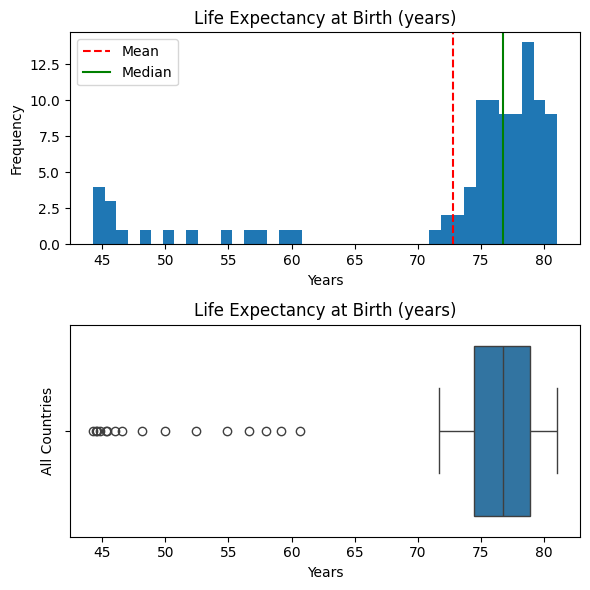

Mean: 72.8 years.
Median: 76.8 years.


In [91]:
# Histogram on 1st axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
ax1.hist(df['Life expectancy at birth (years)'], bins=40)
life_mean = np.mean(df['Life expectancy at birth (years)'])
life_median = np.median(df['Life expectancy at birth (years)'])
ax1.axvline(life_mean, color='r', linestyle='--', label='Mean')
ax1.axvline(life_median, color='g', linestyle='-', label='Median')
ax1.legend()
ax1.set_title('Life Expectancy at Birth Distribution')
ax1.set_xlabel('Years')
ax1.set_ylabel('Frequency')

# Boxplot on 2nd axis, plotted horizontally
sns.boxplot(x='Life expectancy at birth (years)', data=df)
ax2.set_title('Life Expectancy at Birth Boxplot')
ax2.set_ylabel('All Countries')
ax2.set_xlabel('Years')

plt.tight_layout()
plt.show()

# Print the mean and median of life expectancy
print(f'Mean: {life_mean:.1f} years.')
print(f'Median: {life_median:.1f} years.')

There are a significant number of outliers below the lower bound i.e. less than Q1 - 1.5 * IQR. This is quantified as follows:

In [18]:
# Calculate quartiles, IQR, lower bound and outliers
life = df['Life expectancy at birth (years)']
life_Q1 = life.quantile(0.25)
life_Q3 = life.quantile(0.75)
life_IQR = life_Q3 - life_Q1
life_lower_bound = life_Q1 - 1.5 * life_IQR
life_outliers_below = life[life < life_lower_bound].count()

# Print lower bound, outliers, Q1 and Q3
print(f"Lower bound: {life_lower_bound:.1f} years.")
print(f"Number of outliers below the lower bound: {life_outliers_below} observations.")
print(f"Q1: {life_Q1:.1f} years.")
print(f"Q3: {life_Q3:.1f} years.")

Lower bound: 67.8 years.
Number of outliers below the lower bound: 16 observations.
Q1: 74.5 years.
Q3: 78.9 years.


#### Interesting... 🤔

- Half the observations have a life expectancy between 75 and 79 years i.e. the interquartile range.
- 16 out of 96 (17%) observations are outliers, and all are below the lower bound of 67.8 years. This is the number of observations per country so might be attributed to one country, but will be further investigated in the next section.
- The data is negatively-skewed (left tail), with the **mean** life expectancy (~73 years) being **lower** than the **median** life expectancy (~77 years).

### Country Focus 🔍

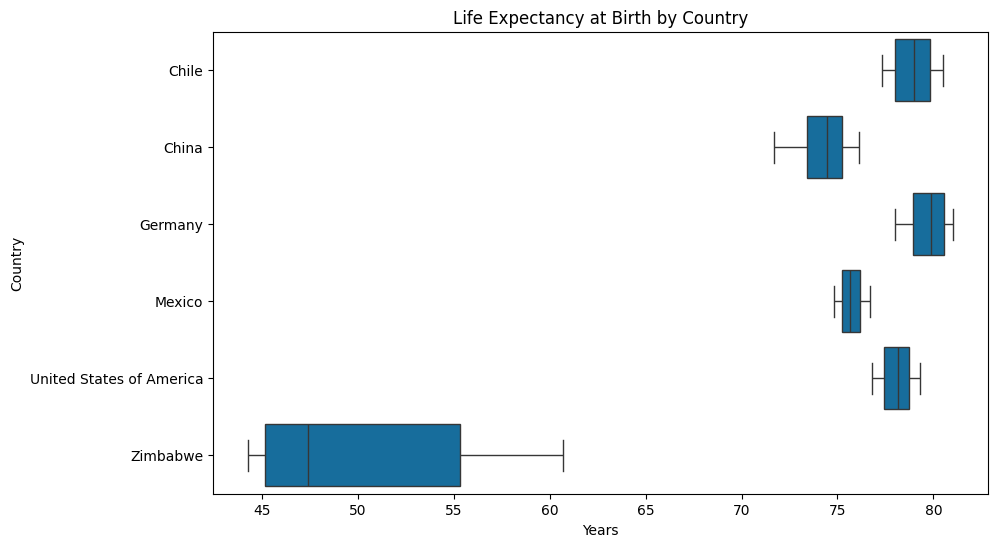

Median Life expectancy at birth (years) per country, descending:
Germany: 79.8
Chile: 79.0
United States of America: 78.2
Mexico: 75.7
China: 74.5
Zimbabwe: 47.4


In [17]:
# Boxplots for 'Life expectancy at birth (years)' by 'Country'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Life expectancy at birth (years)', y='Country', data=df)
plt.title('Life Expectancy at Birth by Country')
plt.xlabel('Years')
plt.ylabel('Country')
plt.show()

# Print the median life expectancy at birth for each country, in descending order
countries = ['Germany', 'Chile', 'United States of America', 'Mexico', 'China', 'Zimbabwe']

print('Median Life expectancy at birth (years) per country, descending:')
for country in countries:
    life_median = df[df['Country'] == country]['Life expectancy at birth (years)'].median()
    print(f"{country}: {life_median:.1f}")


#### Interesting... 🤔

This plot shows that Germany has the longest life expectancy, followed by Chile, China, Mexico, the United States, and Zimbabwe. Zimbabwe's observations appear on the previous boxplot as outliers because they are significantly lower than the other countries in the dataset. Zimbabwe's median life expectancy (~47 years) is around 30 years lower than the next lowest country in the dataset (China).

## GDP 💰

### All Countries

To help visualise the dataset metrics, boxplots and histograms are used to show the distribution of GDP across all countries in the dataset. These plots are stacked vertically to allow for easy comparison.

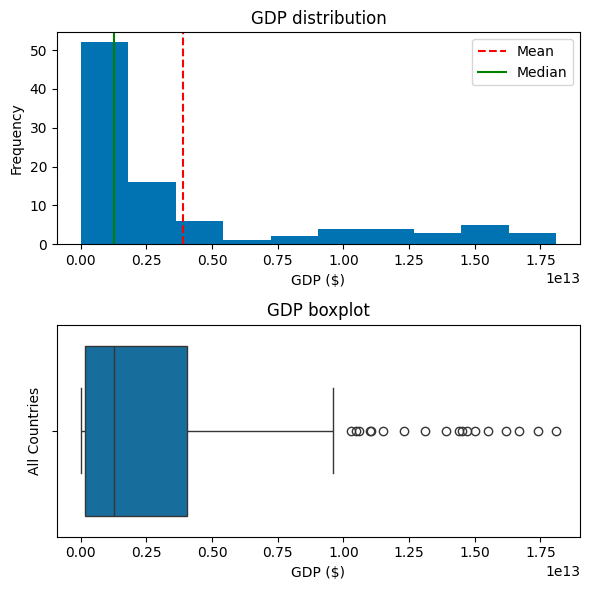

Mean: 3.88E+12.
Median: 1.28E+12.


In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Histogram on 1st axis
ax1.hist(df['GDP'])
gdp_mean = np.mean(df['GDP'])
gdp_median = np.median(df['GDP'])
ax1.axvline(gdp_mean, color='r', linestyle='--', label='Mean')
ax1.axvline(gdp_median, color='g', linestyle='-', label='Median')
ax1.legend()
ax1.set_title('GDP distribution')
ax1.set_xlabel('GDP ($)')
ax1.set_ylabel('Frequency')

# Boxplot on 2nd axis, plotted horizontally
sns.boxplot(x='GDP', data=df)
ax2.set_title('GDP boxplot')
ax2.set_ylabel('All Countries')
ax2.set_xlabel('GDP ($)')

plt.tight_layout()
plt.show()

# Print the mean and median of GDP
print(f'Mean: {gdp_mean:.2E}.')
print(f'Median: {gdp_median:.2E}.')

There are a significant number of outliers above the upper bound i.e. more than Q3 + 1.5 * IQR. This is quantified as follows:

In [13]:
# Calculate quartiles, IQR, upper bound and number of outliers
gdp = df['GDP']
gdp_Q1 = gdp.quantile(0.25)
gdp_Q3 = gdp.quantile(0.75)
gdp_IQR = gdp_Q3 - gdp_Q1
gdp_upper_bound = gdp_Q3 + 1.5 * gdp_IQR
gdp_outliers_above = gdp[gdp > gdp_upper_bound].count()

# Print upper bound, outliers, Q1 and Q3 
print(f"Upper bound: $ {gdp_upper_bound:.2E}.")
print(f"Number of outliers above the upper bound: {gdp_outliers_above} observations.")
print(f"Q1: {gdp_Q1:.2E}")
print(f"Q3: {gdp_Q3:.2E}")

Upper bound: $ 9.91E+12.
Number of outliers above the upper bound: 18 observations.
Q1: 1.73E+11
Q3: 4.07E+12


#### Interesting... 🤔

- Half the observations have a GDP between $1.73E+11 and $4.07E+12 i.e. the interquartile range.
- 18 out of 96 (19%) observations are outliers, and all are above the upper bound of $9.91E+12. This could be due to the discrepancies between individual countries, and will be further investigated in the next section.
- The data is positively-skewed (right tail), with the **mean** life expectancy ($3.88E+12) being **more** than the **median** life expectancy ($1.28E+12).

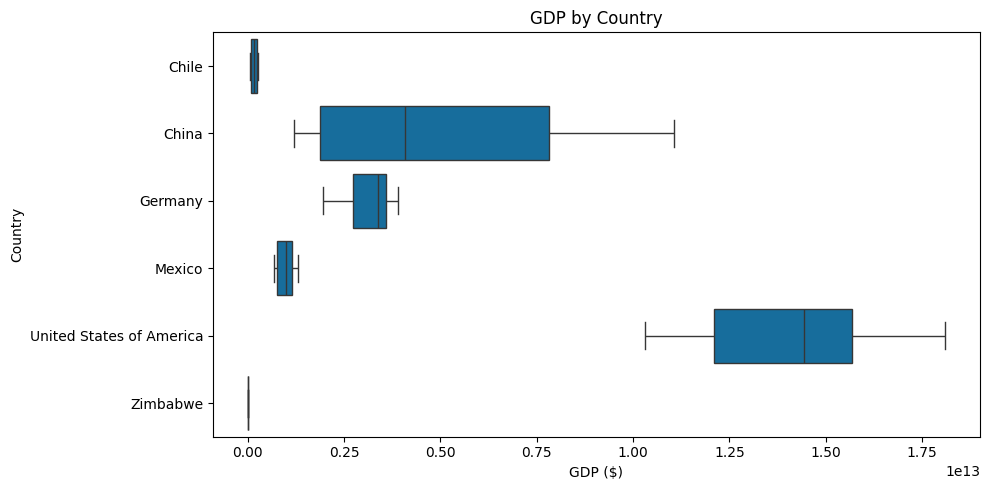

GDP per country, descending:
United States of America median GDP: $ 1.44E+13
China median GDP: $ 4.08E+12
Germany median GDP: $ 3.40E+12
Mexico median GDP: $ 1.00E+12
Chile median GDP: $ 1.73E+11
Zimbabwe median GDP: $ 6.73E+09


In [22]:
# Create a boxplot of GDP by country
plt.figure(figsize=(10, 5))
sns.boxplot(x='GDP', y='Country', data=df)
plt.title('GDP by Country')
plt.ylabel('Country')
plt.xlabel('GDP ($)')
plt.tight_layout()
plt.show()

# Print the median GDP for each country in descending order
print('GDP per country, descending:')
countries = ['United States of America', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe']
for country in countries:
    gdp_median = df[df['Country'] == country]['GDP'].median()
    print(f"{country} median GDP: $ {gdp_median:.2E}")

This plot shows that the USA has the highest GDP, followed by China, Germany, Mexico, Chile, and Zimbabwe. USA's observations appear on the previous boxplot as outliers because they are significantly higher than the other countries in the dataset. The USA's median GDP (~1.4E+13) is around 3.5x higher than the next highest median, China (~4.1E+12).

# Deeper Dive 🤿

### 1. How has GDP and life expectancy changed over time for the countries in the dataset?

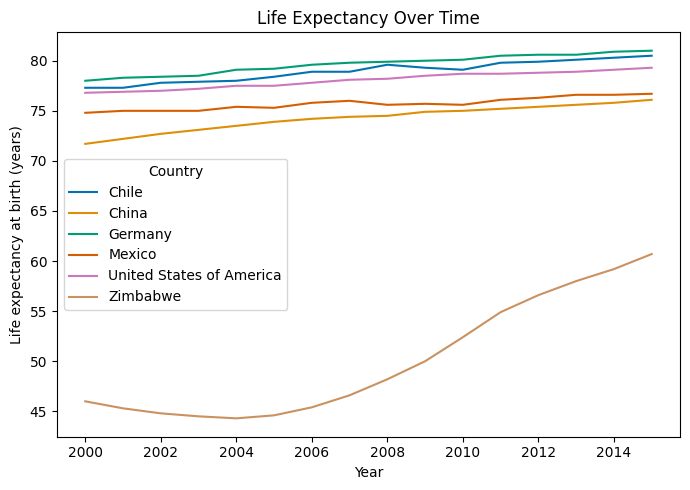

In [12]:
plt.figure(figsize=(7, 5))
sns.lineplot(x='Year', y='Life expectancy at birth (years)', hue='Country', data=df, palette='colorblind')
plt.title('Life Expectancy Over Time')
plt.ylabel('Life expectancy at birth (years)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

The life expectancy for all countries increased over time with the exception of Zimbabwe, which experienced a decline in life expectancy from 2000 to 2004, linked to their high rates of [HIV/AIDS](https://www.bbc.com/news/world-africa-42013720). However, since 2004 life expectancy rose to around 60 years in 2015, which was still 16 years lower than the next lowest country in the dataset (China).

### 2. Are all countries **increasing** their GDP and life expectancy or are some countries experiencing a **decline** in one or both indicators?

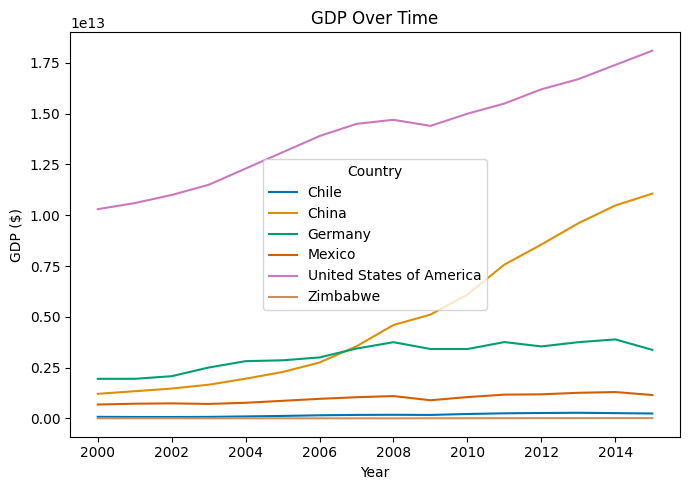

In [11]:
plt.figure(figsize=(7, 5))
sns.lineplot(x='Year', y='GDP', hue='Country', data=df)
sns.set_palette('colorblind')
plt.title('GDP Over Time')
plt.ylabel('GDP ($)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

GDP for USA, China and Germany has been increasing over time. GDP for Mexico, Chile and Zimbabwe is difficult to guage due to the scale, so the following plot shows the GDP growth rate for each country, with a horizontal line at 0 to indicate positive or negative change.

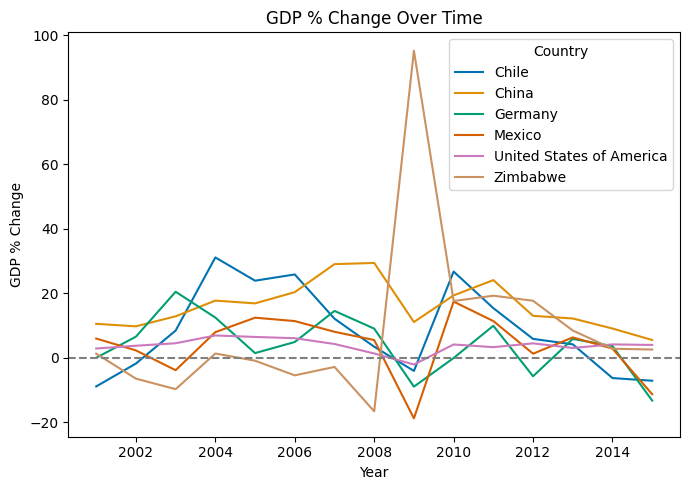

In [10]:
plt.figure(figsize=(7, 5))
sns.set_palette('colorblind')

# Loop through each country and plot the GDP % change
for country in df['Country'].unique():
    country_df = df[df['Country'] == country].copy()
    country_df['GDP % change'] = country_df['GDP'].pct_change() * 100
    sns.lineplot(x='Year', y='GDP % change', data=country_df, label=country)

plt.title('GDP % Change Over Time')
plt.ylabel('GDP % Change')
plt.xlabel('Year')
plt.axhline(0, color='grey', linestyle='--')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

Only China has enjoyed a positive growth rate in GDP over the whole 16-year period. The other countries have experienced years where GDP has declined, but the overall trend is positive for all. Zimbabwe has experienced the most volatile GDP growth rate, with a significant increase in 2009, which coincides with them [adopting the US dollar](https://www.bbc.com/news/world-africa-42013720) as their official currency.

### 3. Is there a **correlation** between GDP and life expectancy of a country?

One measure of correlation is the Pearson correlation coefficient, which ranges from -1 to 1. A value of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship. It assumes that the relationship between the two variables is linear.

In [179]:
# Calculate and print the Pearson correlation coefficient between 'GDP' and 'Life expectancy at birth (years)'
pearson_corr = df['GDP'].corr(df['Life expectancy at birth (years)'])
print(f"Pearson correlation coefficient: {pearson_corr:.2f}")

Pearson correlation coefficient: 0.34


The Pearson correlation coefficient between GDP and life expectancy is 0.34, which suggests a weak positive linear relationship between the two variables across all the countries and 16 years in the dataset.

If we create plots for every year for life expectancy vs GDP, we can see that over time, the gradient of the line of best fit is decreasing, which may suggest that the correlation between GDP and life expectancy is decreasing over time.

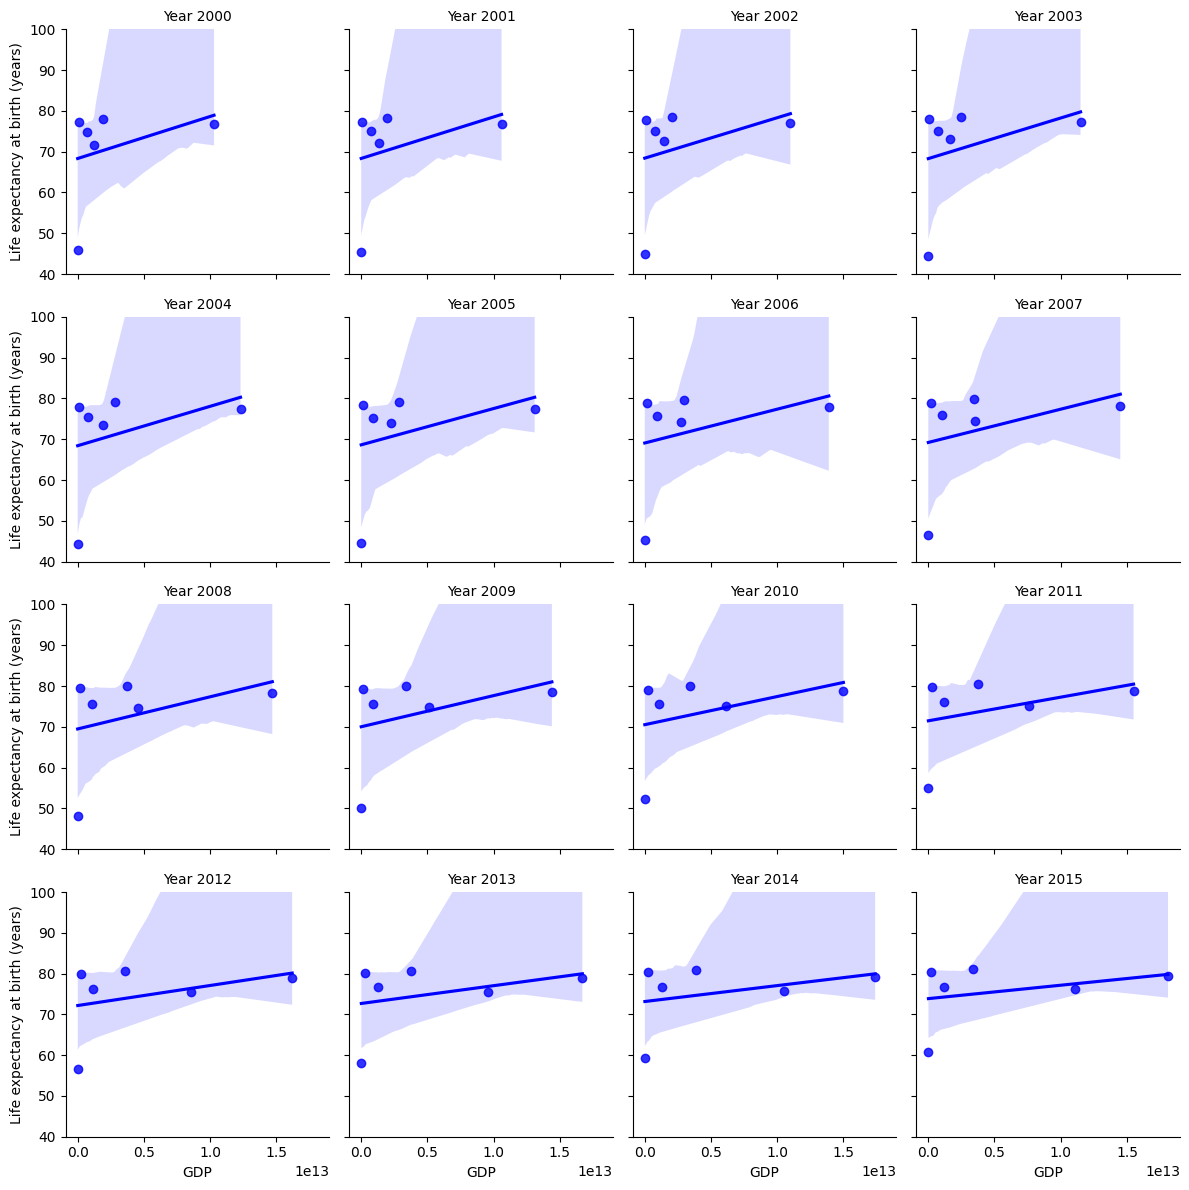

In [173]:
# Create the FacetGrid
g = sns.FacetGrid(df, col='Year', col_wrap=4, height=3)

# Map the regplot to the grid
g.map(sns.regplot, 'GDP', 'Life expectancy at birth (years)', color='b')

# Set titles for each subplot
g.set_titles('Year {col_name}')

# Iterate over each axis and set the y-axis limits based on the data for each year
for ax in g.axes.flat:
    year = int(ax.get_title().split()[-1])
    year_data = df[df['Year'] == year]
    ax.set_ylim(40, 100)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Note: the confidence intervals for the regression lines suggest a significant amount of uncertainty in the relationship between GDP and life expectancy, which is likely due to the small sample size of 6 countries.

In [186]:
# Calculating and printing the Pearson correlation coefficient between 'GDP' and 'Life expectancy at birth (years)' for each year
for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    pearson_corr = year_data['GDP'].corr(year_data['Life expectancy at birth (years)'])
    print(f"Pearson correlation coefficient for {year}: {pearson_corr:.2f}")


Pearson correlation coefficient for 2000: 0.33
Pearson correlation coefficient for 2001: 0.33
Pearson correlation coefficient for 2002: 0.32
Pearson correlation coefficient for 2003: 0.33
Pearson correlation coefficient for 2004: 0.34
Pearson correlation coefficient for 2005: 0.33
Pearson correlation coefficient for 2006: 0.33
Pearson correlation coefficient for 2007: 0.35
Pearson correlation coefficient for 2008: 0.36
Pearson correlation coefficient for 2009: 0.36
Pearson correlation coefficient for 2010: 0.38
Pearson correlation coefficient for 2011: 0.36
Pearson correlation coefficient for 2012: 0.35
Pearson correlation coefficient for 2013: 0.34
Pearson correlation coefficient for 2014: 0.33
Pearson correlation coefficient for 2015: 0.32


Over the 16 years of data collection (2000-2015), the correlation between GDP and life expectancy fluctuates between 0.32 and 0.38, which suggests a weak positive linear relationship between the two variables.

# Closing Thoughts

Using a range of tools (boxplots, histograms, scatter plots, and the Pearson correlation coefficient), it is possible to explore the relationship between GDP and life expectancy for 6 countries over 16 years. Generally, life expectancy and GDP has increased over time for all countries, suggesting a positive correlation between these two variables. However, this correlation was quantified and found to be positive but weak, meaning it is not possible to say that one causes the other with any certainty.

The uncertainty was likely due to a relatively small dataset. Moreover, the dataset includes observations from Zimbabwe at a particularly volatile time in their history with regards to their life expectancy (driven largely by the HIV/Aids epidemic) and GDP (due to the adoption of the US dollar as their official currency). This could have skewed the results and made it difficult to draw meaningful conclusions.